In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import cv2

#### path to dataset

In [14]:

train_dir = "Dataset_glaucoma/Train_data/Training/Images"
test_dir = "Dataset_glaucoma/Test_data/Test/Images"

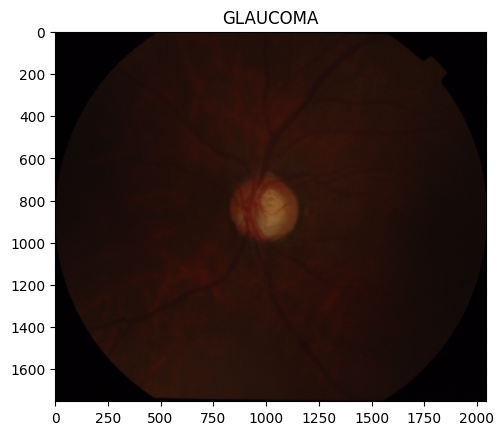

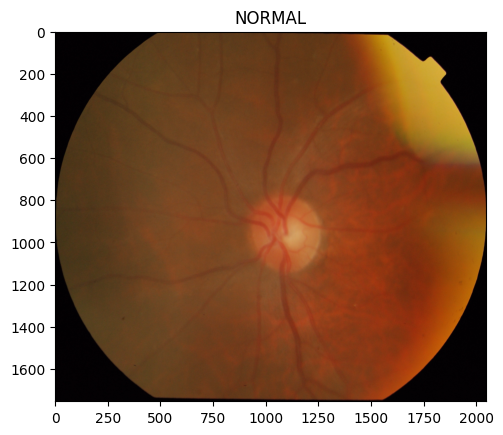

In [16]:
classes = os.listdir(train_dir)

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    images = os.listdir(class_path)[:1]  
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(cls)
        plt.show()

In [4]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

##### data agumentation

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [17]:
# Creating data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 50 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


# model Building

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


/home/vishwadharani/Code+Notes/Glaucoma_detection/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733994742.809211  150740 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [20]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20
)


/home/vishwadharani/Code+Notes/Glaucoma_detection/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - accuracy: 0.4444 - loss: 0.7030

2024-12-12 14:42:51.802754: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2024-12-12 14:42:51.996479: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4822 - loss: 0.7906

2024-12-12 14:42:57.983080: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 10s/step - accuracy: 0.4948 - loss: 0.8198 - val_accuracy: 0.7451 - val_loss: 0.6408
Epoch 2/20


2024-12-12 14:43:02.184201: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - accuracy: 0.5312 - loss: 0.6994

2024-12-12 14:43:02.421283: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.5238 - loss: 0.7028 - val_accuracy: 0.2549 - val_loss: 0.7089
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.4896 - loss: 0.6979 - val_accuracy: 0.7451 - val_loss: 0.6474
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6304 - loss: 0.6790 - val_accuracy: 0.7451 - val_loss: 0.6013
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.7044 - loss: 0.6568 - val_accuracy: 0.7451 - val_loss: 0.5749
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.6246 - loss: 0.7055 - val_accuracy: 0.7451 - val_loss: 0.6042
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6170 - loss: 0.6810 - val_accuracy: 0.7451 - val_loss: 0.6333
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.6350 - loss: 0.6736 - val_accuracy: 0.7451 - val_loss: 0.6407
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.6454 - loss: 0.6658 - val_accuracy: 0.7451 - val_loss: 0.6135
Epoch 10/20
2/2 ━━━━━━━━━━━

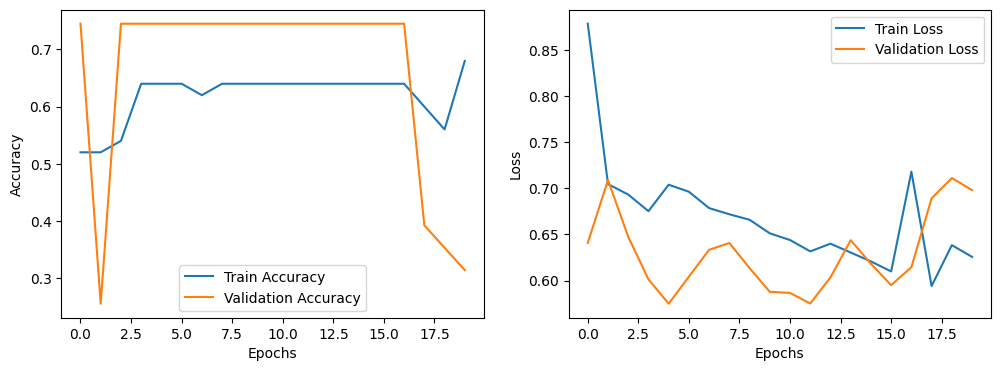

In [22]:

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:

# Evaluate the model on the test set
predictions = model.predict(test_data)
predictions = (predictions > 0.5).astype(int)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [26]:
# Ground truth labels
true_labels = test_data.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.32      0.41        38
           1       0.13      0.31      0.19        13

    accuracy                           0.31        51
   macro avg       0.35      0.31      0.30        51
weighted avg       0.46      0.31      0.35        51



In [28]:

print("Confusion Matrix:")
cm = confusion_matrix(true_labels, predictions)
print(cm)

Confusion Matrix:
[[12 26]
 [ 9  4]]


In [31]:
# Visualizing feature maps (optional: first convolutional layer)
from tensorflow.keras.models import Model

In [32]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

AttributeError: The layer sequential has never been called and thus has no defined input.